## Functions from his code

In [633]:
# importing the wisconsin cancer dataset

import sklearn.datasets

bunch = sklearn.datasets.load_breast_cancer(as_frame=True)
data = bunch['data']
target = bunch['target']

Eigenvalues of Hessian Matrix:[0.36964774 3.93040976]
[[3.96888221]
 [3.06840879]]
[[3.96888221]
 [3.06840879]]


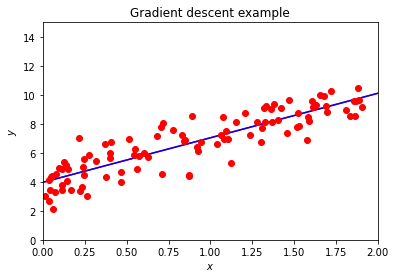

In [634]:
#gradient descent example

# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

# the number of datapoints
n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
# Hessian matrix
H = (2.0/n)* X.T @ X
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

beta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta_linreg)
beta = np.random.randn(2,1)

eta = 1.0/np.max(EigValues)
Niterations = 1000

for iter in range(Niterations):
    gradient = (2.0/n)*X.T @ (X @ beta-y)
    beta -= eta*gradient

print(beta)
xnew = np.array([[0],[2]])
xbnew = np.c_[np.ones((2,1)), xnew]
ypredict = xbnew.dot(beta)
ypredict2 = xbnew.dot(beta_linreg)
plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example')
plt.show()

Eigenvalues of Hessian Matrix:[0.38022061 4.196598  ]
[[3.92139099]
 [3.02893186]]
[[3.92130826]
 [3.02900298]]


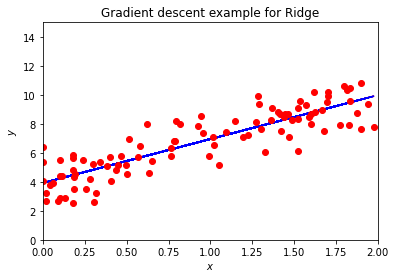

In [635]:
#gradient descent with ridge

from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

# the number of datapoints
n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X

#Ridge parameter lambda
lmbda  = 0.001
Id = n*lmbda* np.eye(XT_X.shape[0])

# Hessian matrix
H = (2.0/n)* XT_X+2*lmbda* np.eye(XT_X.shape[0])
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")


beta_linreg = np.linalg.inv(XT_X+Id) @ X.T @ y
print(beta_linreg)
# Start plain gradient descent
beta = np.random.randn(2,1)

eta = 1.0/np.max(EigValues)
Niterations = 100

for iter in range(Niterations):
    gradients = 2.0/n*X.T @ (X @ (beta)-y)+2*lmbda*beta
    beta -= eta*gradients

print(beta)
ypredict = X @ beta
ypredict2 = X @ beta_linreg
plt.plot(x, ypredict, "r-")
plt.plot(x, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example for Ridge')
plt.show()

>0 f([0.74724774]) = 0.55838
>1 f([0.54175461]) = 0.29350
>2 f([0.37175575]) = 0.13820
>3 f([0.24640494]) = 0.06072
>4 f([0.15951871]) = 0.02545
>5 f([0.1015491]) = 0.01031
>6 f([0.0638484]) = 0.00408
>7 f([0.03976851]) = 0.00158
>8 f([0.02459084]) = 0.00060
>9 f([0.01511937]) = 0.00023
>10 f([0.00925406]) = 0.00009
>11 f([0.00564365]) = 0.00003
>12 f([0.0034318]) = 0.00001
>13 f([0.00208188]) = 0.00000
>14 f([0.00126053]) = 0.00000
>15 f([0.00076202]) = 0.00000
>16 f([0.00046006]) = 0.00000
>17 f([0.00027746]) = 0.00000
>18 f([0.00016719]) = 0.00000
>19 f([0.00010067]) = 0.00000
>20 f([6.05804744e-05]) = 0.00000
>21 f([3.64373635e-05]) = 0.00000
>22 f([2.19069576e-05]) = 0.00000
>23 f([1.31664443e-05]) = 0.00000
>24 f([7.91100141e-06]) = 0.00000
>25 f([4.75216828e-06]) = 0.00000
>26 f([2.85408468e-06]) = 0.00000
>27 f([1.71384267e-06]) = 0.00000
>28 f([1.02900153e-06]) = 0.00000
>29 f([6.17748881e-07]) = 0.00000


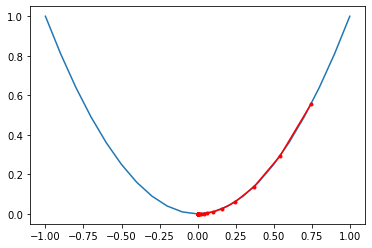

In [636]:
# gradient descent with momentum

from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
 
# objective function
def objective(x):
	return x**2.0
 
# derivative of objective function
def derivative(x):
	return x * 2.0
 
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# keep track of the change
	change = 0.0
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# calculate update
		new_change = step_size * gradient + momentum * change
		# take a step
		solution = solution - new_change
		# save the change
		change = new_change
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]
 
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

Own inversion
[[4.08805934]
 [2.86802426]]
Eigenvalues of Hessian Matrix:[0.26504701 4.42519896]
theta from own gd
[[4.08805934]
 [2.86802426]]
theta from own sdg
[[4.10653666]
 [2.86499207]]


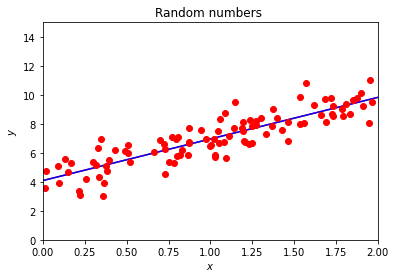

In [637]:
#code adding stochastic gradient descent

# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 1000


for iter in range(Niterations):
    gradients = 2.0/n*X.T @ ((X @ theta)-y)
    theta -= eta*gradients
print("theta from own gd")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
# Can you figure out a better way of setting up the contributions to each batch?
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (2.0/M)* xi.T @ ((xi @ theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
print("theta from own sdg")
print(theta)

plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

In [638]:
# Using Autograd to calculate gradients using AdaGrad and Stochastic Gradient descent
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 10000
x = np.random.rand(n,1)
y = 2.0+3*x +4*x*x# +np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)
# Define parameters for Stochastic Gradient Descent
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
# Guess for unknown parameters theta
theta = np.random.randn(3,1)

# Value for learning rate
eta = 0.01
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-8
for epoch in range(n_epochs):
    # The outer product is calculated from scratch for each epoch
    Giter = np.zeros(shape=(3,3))
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
	# Calculate the outer product of the gradients
        Giter +=gradients @ gradients.T
	# Simpler algorithm with only diagonal elements
        Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Giter)))]
        # compute update
        update = np.multiply(Ginverse,gradients)
        theta -= update
print("theta from own AdaGrad")
print(theta)

Own inversion
[[2.]
 [3.]
 [4.]]
theta from own AdaGrad
[[2.00000112]
 [2.99999156]
 [4.00000829]]


In [639]:
# Using Autograd to calculate gradients using RMSprop and Stochastic Gradient descent
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 10000
x = np.random.rand(n,1)
y = 2.0+3*x +4*x*x# +np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)
# Define parameters for Stochastic Gradient Descent
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
# Guess for unknown parameters theta
theta = np.random.randn(3,1)

# Value for learning rate
eta = 0.01
# Value for parameter rho
rho = 0.99
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-8
for epoch in range(n_epochs):
    Giter = np.zeros(shape=(3,3))
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
	# Previous value for the outer product of gradients
        Previous = Giter
	# Accumulated gradient
        Giter +=gradients @ gradients.T
	# Scaling with rho the new and the previous results
        Gnew = (rho*Previous+(1-rho)*Giter)
	# Taking the diagonal only and inverting
        Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Gnew)))]
	# Hadamard product
        update = np.multiply(Ginverse,gradients)
        theta -= update
print("theta from own RMSprop")
print(theta)

Own inversion
[[2.]
 [3.]
 [4.]]
theta from own RMSprop
[[1.99999996]
 [3.00000021]
 [3.9999998 ]]


In [640]:
# to implement: SGD with ADAM!

# Code for Neural Networks

All the codes are presented in weeke 41 jupyternotebook

In [641]:
class NeuralNetwork:
    def __init__(
            self,
            X_data,
            Y_data,
            n_hidden_neurons=50,
            n_categories=10,
            epochs=10,
            batch_size=100,
            eta=0.1,
            lmbd=0.0):

        self.X_data_full = X_data
        self.Y_data_full = Y_data

        self.n_inputs = X_data.shape[0]
        self.n_features = X_data.shape[1]
        self.n_hidden_neurons = n_hidden_neurons
        self.n_categories = n_categories

        self.epochs = epochs
        self.batch_size = batch_size
        self.iterations = self.n_inputs // self.batch_size
        self.eta = eta
        self.lmbd = lmbd

        self.create_biases_and_weights()
        
    def create_biases_and_weights(self):
        self.hidden_weights = np.random.randn(self.n_features, self.n_hidden_neurons)
        self.hidden_bias = np.zeros(self.n_hidden_neurons) + 0.01

        self.output_weights = np.random.randn(self.n_hidden_neurons, self.n_categories)
        self.output_bias = np.zeros(self.n_categories) + 0.01

    def feed_forward(self):
        # feed-forward for training
        self.z_h = np.matmul(self.X_data, self.hidden_weights) + self.hidden_bias
        self.a_h = sigmoid(self.z_h)

        self.z_o = np.matmul(self.a_h, self.output_weights) + self.output_bias

        exp_term = np.exp(self.z_o)
        self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)

    def feed_forward_out(self, X):
        # feed-forward for output
        z_h = np.matmul(X, self.hidden_weights) + self.hidden_bias
        a_h = sigmoid(z_h)

        z_o = np.matmul(a_h, self.output_weights) + self.output_bias
        
        exp_term = np.exp(z_o)
        probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)
        return probabilities

    def backpropagation(self):
        error_output = self.probabilities - self.Y_data
        error_hidden = np.matmul(error_output, self.output_weights.T) * self.a_h * (1 - self.a_h)

        self.output_weights_gradient = np.matmul(self.a_h.T, error_output)
        self.output_bias_gradient = np.sum(error_output, axis=0)

        self.hidden_weights_gradient = np.matmul(self.X_data.T, error_hidden)
        self.hidden_bias_gradient = np.sum(error_hidden, axis=0)

        if self.lmbd > 0.0:
            self.output_weights_gradient += self.lmbd * self.output_weights
            self.hidden_weights_gradient += self.lmbd * self.hidden_weights

        self.output_weights -= self.eta * self.output_weights_gradient
        self.output_bias -= self.eta * self.output_bias_gradient
        self.hidden_weights -= self.eta * self.hidden_weights_gradient
        self.hidden_bias -= self.eta * self.hidden_bias_gradient

    def predict(self, X):
        probabilities = self.feed_forward_out(X)
        return np.argmax(probabilities, axis=1)

    def predict_probabilities(self, X):
        probabilities = self.feed_forward_out(X)
        return probabilities

    def train(self):
        data_indices = np.arange(self.n_inputs)

        for i in range(self.epochs):
            for j in range(self.iterations):
                # pick datapoints with replacement
                chosen_datapoints = np.random.choice(
                    data_indices, size=self.batch_size, replace=False
                )

                # minibatch training data
                self.X_data = self.X_data_full[chosen_datapoints]
                self.Y_data = self.Y_data_full[chosen_datapoints]

                self.feed_forward()
                self.backpropagation()



In [648]:
# logistic regression (?) from week 39

import autograd.numpy as np
from autograd import grad

def sigmoid(x):
    return 0.5 * (np.tanh(x / 2.) + 1)

def logistic_predictions(weights, inputs):
    # Outputs probability of a label being true according to logistic model.
    return sigmoid(np.dot(inputs, weights))

def training_loss(weights):
    # Training loss is the negative log-likelihood of the training labels.
    preds = logistic_predictions(weights, inputs)
    label_probabilities = preds * targets + (1 - preds) * (1 - targets)
    return -np.sum(np.log(label_probabilities))

# Build a toy dataset.
inputs = np.array([[0.52, 1.12,  0.77],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39]])
targets = np.array([True, True, False, True])

# Define a function that returns gradients of training loss using Autograd.
training_gradient_fun = grad(training_loss)

# Optimize weights using gradient descent.
weights = np.array([0.0, 0.0, 0.0])
print("Initial loss:", training_loss(weights))
for i in range(100):
    weights -= training_gradient_fun(weights) * 0.01

print("Trained loss:", training_loss(weights))


Initial loss: 2.772588722239781
Trained loss: 1.067270675787016


## Our own code

In [1]:
# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import time
from sklearn.preprocessing import StandardScaler
import random
import seaborn as sns

In [2]:
# function that does gradient descent with fixed learning rate

def gradient_descent(X, y, eta, n_its):

    # initialize betas randomly
    beta = np.random.randn(np.shape(X)[1],1)

    for iter in range(n_its):
        gradient = X.T @ (X @ beta-y)
        beta -= eta*gradient

    return beta

In [3]:
# function that does gradient descent for OLS

def gradient_descent_linreg(X, y, n_its):

    # initialize betas randomly
    beta = np.random.randn(np.shape(X)[1],1)

    # compute the hessian
    H = X.T @ X
    EigValues, EigVectors = np.linalg.eig(H)
    eta = 1/np.max(EigValues)

    for iter in range(n_its):
        gradient = X.T @ (X @ beta-y)
        beta -= eta*gradient

    return beta

In [4]:
# function that does gradient descent for ridge

def gradient_descent_ridge(X, y, lam, n_its):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],1)

    # compute the hessian
    H = (X.T @ X) + 2 * lam * np.eye(X.shape[1])
    EigValues, EigVectors = np.linalg.eig(H)
    eta = 1/np.max(EigValues)

    for iter in range(n_its):
        gradient = X.T @ (X @ (beta)-y)+2*lam*beta
        beta -= eta*gradient

    return beta

In [5]:
# function that does gradient descent with momentum

def gradient_descent_with_momentum(X, y, eta, delta, n_its):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],1)
    change=0

    for iter in range(n_its):
        gradient = X.T @ (X @ (beta)-y)
        new_change = eta*gradient + delta*change
        beta -= new_change
        change = new_change
        gradient_before = gradient

    return beta

In [7]:
def stochastic_gradient_descent(X, y, eta, n_epochs, size_minibatch):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],1)
    m = int(X.shape[0]/size_minibatch)

    for epoch in range(n_epochs):

        for i in range(m):
            random_index = size_minibatch * np.random.randint(m)
            xi = X[random_index:random_index + size_minibatch]
            yi = y[random_index:random_index + size_minibatch]
            gradients = xi.T @ ((xi @ beta)-yi)
            beta -= eta*gradients

    return beta

In [8]:
def stochastic_gradient_descent_with_adagrad(X, y, eta, delta, n_epochs, size_minibatch):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],1)
    m = int(X.shape[0]/size_minibatch)

    for epoch in range(n_epochs):
        Giter = np.zeros(shape=(X.shape[1],X.shape[1]))
        for i in range(m):
            random_index = size_minibatch * np.random.randint(m)
            xi = X[random_index:random_index + size_minibatch]
            yi = y[random_index:random_index + size_minibatch]
            gradients = xi.T @ ((xi @ beta)-yi)
            Giter += gradients @ gradients.T
            Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Giter)))]
            beta -= np.multiply(Ginverse,gradients)

    return beta

In [9]:
def stochastic_gradient_descent_with_rmsprop(X, y, eta, delta, rho, n_epochs, size_minibatch):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],1)
    m = int(X.shape[0]/size_minibatch)

    for epoch in range(n_epochs):
        Giter = np.zeros(shape=(X.shape[1],X.shape[1]))
        for i in range(m):
            random_index = size_minibatch * np.random.randint(m)
            xi = X[random_index:random_index + size_minibatch]
            yi = y[random_index:random_index + size_minibatch]
            gradients = xi.T @ ((xi @ beta)-yi)
            Previous = Giter
            Giter += gradients @ gradients.T
            Gnew = (rho*Previous+(1-rho)*Giter)
            Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Gnew)))]
            beta -= np.multiply(Ginverse,gradients)

    return beta

In [10]:
def stochastic_gradient_descent_with_adam(X, y, eta, delta, rho1, rho2, n_epochs, size_minibatch):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],1)
    m = int(X.shape[0]/size_minibatch)

    for epoch in range(n_epochs):
        Giter = np.zeros(shape=(X.shape[1],X.shape[1]))
        previous = np.zeros(shape=(X.shape[1],1))
        for i in range(m):
            random_index = size_minibatch * np.random.randint(m)
            xi = X[random_index:random_index + size_minibatch]
            yi = y[random_index:random_index + size_minibatch]
            gradients = xi.T @ ((xi @ beta)-yi)
            gnew = (rho1*previous+(1-rho1)*gradients)
            previous = gnew
            Previous = Giter
            Giter += gradients @ gradients.T
            Gnew = (rho2*Previous+(1-rho2)*Giter)
            Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Gnew)))]
            beta -= np.multiply(Ginverse,gnew)

    return beta

In [14]:
def logistic_regression_sgd(X, y, eta, n_epochs, size_minibatch):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],)
    m = int(X.shape[0]/size_minibatch)

    for epoch in range(n_epochs):

        for i in range(m):
            random_index = size_minibatch * np.random.randint(m)
            xi = X[random_index:random_index + size_minibatch]
            yi = y[random_index:random_index + size_minibatch]
            gradients = (np.squeeze(sigmoid(xi @ beta))-yi) @ xi
            beta -= eta*gradients

    return beta

In [17]:
n = 100
random.seed(6)

x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

Text(0.5, 1.0, 'Comparing GD with and without momentum')

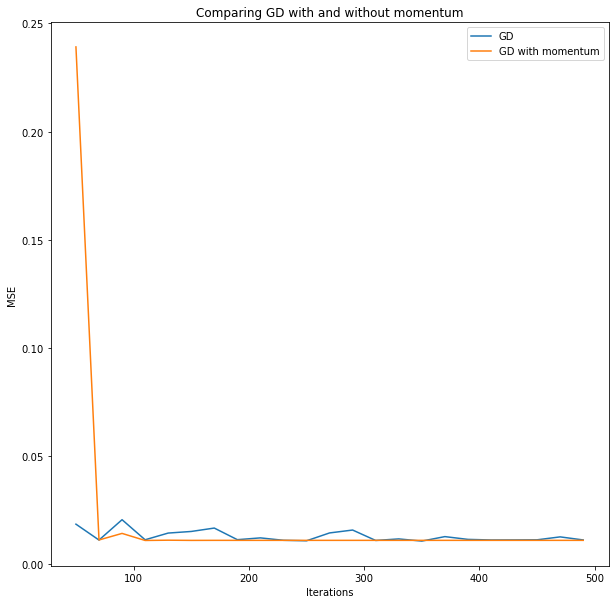

In [18]:
n_its_list = np.arange(50,510,20)
eta=0.015

MSE1_list = []
MSE2_list = []

for n_its in n_its_list:
    betas1 = gradient_descent(Xtrain, ytrain, eta, n_its)
    betas2 = gradient_descent_with_momentum(Xtrain,ytrain,eta,delta=0.9,n_its=n_its)
    MSE1_list.append(mse(ytest,Xtest @ betas1))
    MSE2_list.append(mse(ytest,Xtest @ betas2))

fig = plt.figure(figsize = (10,10))
plt.plot(n_its_list,MSE1_list,label="GD")
plt.plot(n_its_list,MSE2_list,label="GD with momentum")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend()
plt.title("Comparing GD with and without momentum")
#plt.savefig("Comparing GD with and without momentum.png")

Text(0.5, 1.0, 'GD changing momentum parameter')

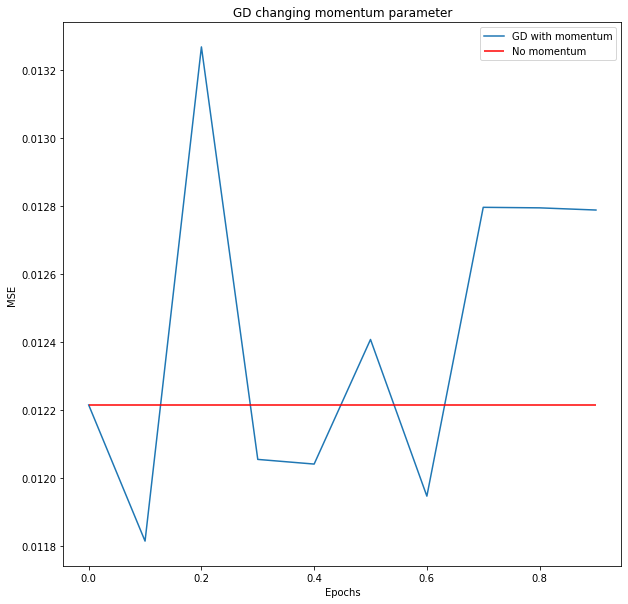

In [19]:
# gd with momentum delta

n = 100
random.seed(6)

x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

n_its = 200
eta=0.015
delta_list = np.arange(0,1,0.1)

MSE_list = {delta:0 for delta in delta_list}

for delta in delta_list:

    betas = gradient_descent_with_momentum(Xtrain, ytrain, eta, delta=delta, n_its=n_its)

    MSE_list[delta] = mse(ytest,Xtest @ betas)

fig = plt.figure(figsize = (10,10))
plt.plot(delta_list,MSE_list.values(),label="GD with momentum")
plt.hlines(MSE_list[0],min(delta_list),max(delta_list),label="No momentum",color='r')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.title("GD changing momentum parameter")
#plt.savefig("GD changing momentum parameter.png")


Text(0.5, 1.0, 'Comparing GD and SGD')

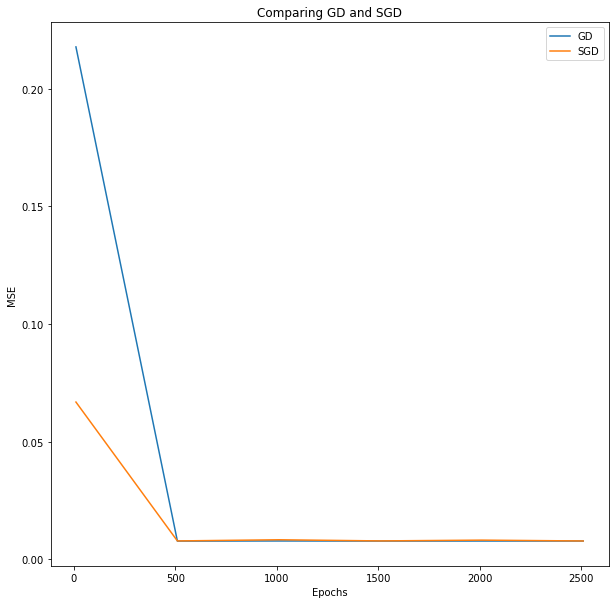

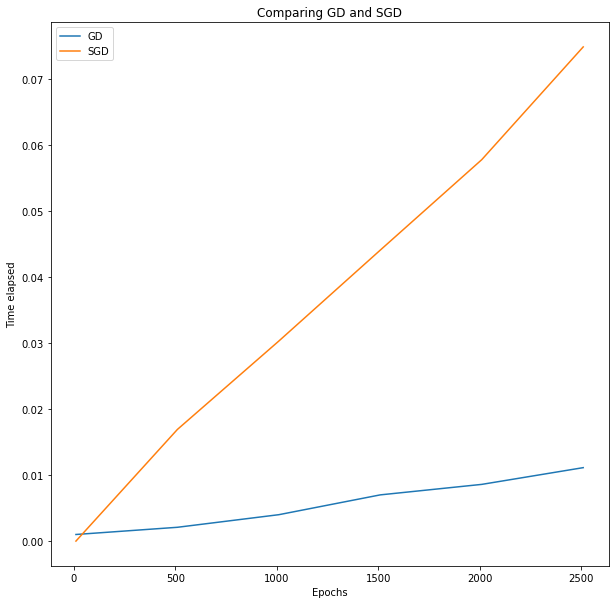

In [20]:
# GD e SGD

n = 100
x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

n_its_list = np.arange(10,3010,500)
eta=0.015
MSE1_list = []
MSE2_list = []
time1_list = []
time2_list = []

for n_its in n_its_list:
    t = time.time()
    betas1 = gradient_descent(Xtrain, ytrain, eta, n_its)
    time1_list.append(time.time()-t)
    t = time.time()
    betas2 = stochastic_gradient_descent(Xtrain,ytrain,eta,n_its,20)
    time2_list.append(time.time()-t)
    MSE1_list.append(mse(ytest,Xtest @ betas1))
    MSE2_list.append(mse(ytest,Xtest @ betas2))

fig = plt.figure(figsize = (10,10))
plt.plot(n_its_list,MSE1_list,label="GD")
plt.plot(n_its_list,MSE2_list,label="SGD")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.title("Comparing GD and SGD")
#plt.savefig("Comparing GD and SGD.png")

fig = plt.figure(figsize = (10,10))
plt.plot(n_its_list,time1_list,label="GD")
plt.plot(n_its_list,time2_list,label="SGD")
plt.xlabel("Epochs")
plt.ylabel("Time elapsed")
plt.legend()
plt.title("Comparing GD and SGD")
#plt.savefig("Comparing GD and SGD.png")

In [21]:
# comparing different learning rate methods

n = 100
x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

n_its_list = np.arange(500,3500,500)
eta=0.015
MSE1_list = np.zeros(len(n_its_list))
MSE2_list = np.zeros(len(n_its_list))
MSE3_list = np.zeros(len(n_its_list))
MSE4_list = np.zeros(len(n_its_list))


for i in range(len(n_its_list)):

    n_its = n_its_list[i]

    betas1 = stochastic_gradient_descent(Xtrain,ytrain,eta,n_its,20)
    betas2 = stochastic_gradient_descent_with_adagrad(Xtrain,ytrain,eta, 0.9 ,n_its, 20)
    betas3 = stochastic_gradient_descent_with_adam(Xtrain,ytrain,eta, 0.9, 0.9, 0.99,n_its,20)
    betas4 = stochastic_gradient_descent_with_rmsprop(Xtrain,ytrain,eta, 0.9, 0.9,n_its,20)

    MSE1_list[i] = (mse(ytest,Xtest @ betas1))
    MSE2_list[i] = (mse(ytest,Xtest @ betas2))
    MSE3_list[i] = (mse(ytest,Xtest @ betas3))
    MSE4_list[i] = (mse(ytest,Xtest @ betas4))

Text(0.5, 1.0, 'Comparing learning rate adapting methods')

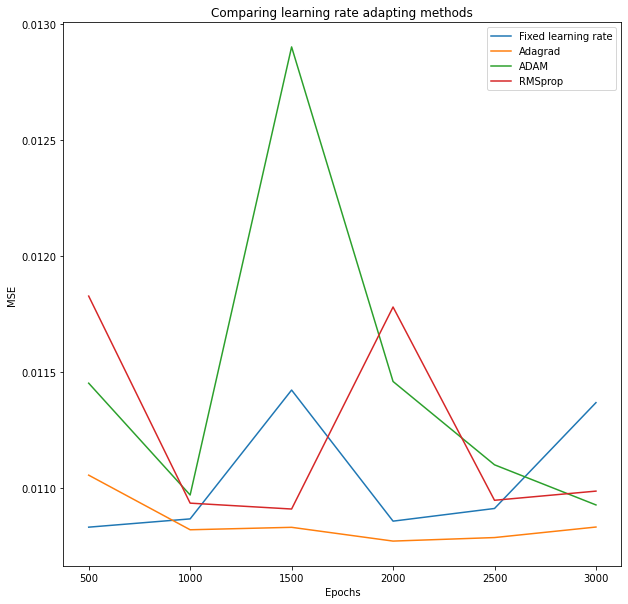

In [22]:
fig = plt.figure(figsize = (10,10))
plt.plot(n_its_list,MSE1_list,label="Fixed learning rate")
plt.plot(n_its_list,MSE2_list,label="Adagrad")
plt.plot(n_its_list,MSE3_list,label="ADAM")
plt.plot(n_its_list,MSE4_list,label="RMSprop")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.title("Comparing learning rate adapting methods")
#plt.savefig("Comparing learning rate adapting methods.png")

In [23]:
#gridsearch (batch size, learning rate)

batch_sizes = [1,5,10,20,50]
eta_list = [0.0005, 0.001, 0.005, 0.01, 0.015]

MSE = np.zeros((len(batch_sizes), len(eta_list)))

for i in range(len(batch_sizes)):
    batch_size = batch_sizes[i]
    for j in range(len(eta_list)):
        eta = eta_list[j]
        betas = stochastic_gradient_descent(X,y,eta,100,batch_size)
        MSE[i,j] =  mse(ytest,Xtest @ betas)

Text(0.5, 1.0, 'MSE grid search for learning rate and batch size')

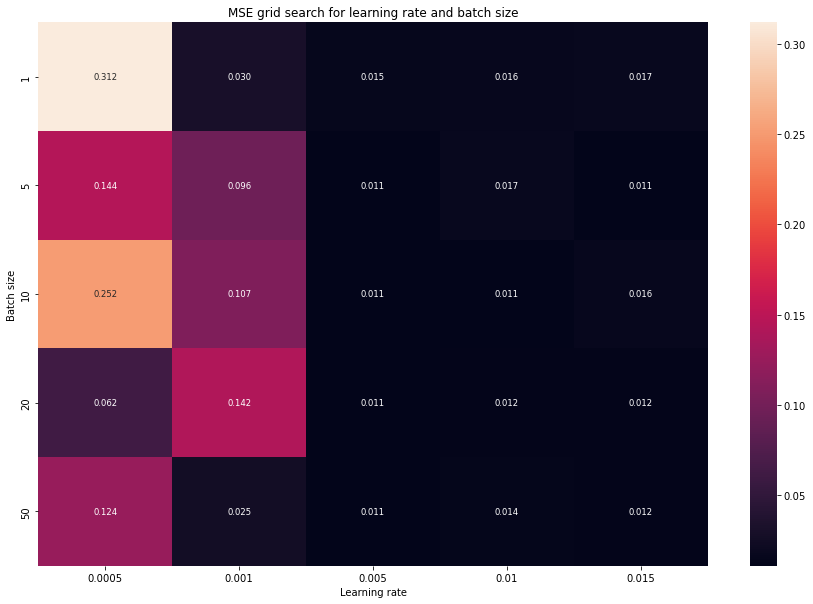

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(MSE, xticklabels=eta_list, yticklabels=batch_sizes, annot=True,annot_kws={"size": 8.5}, fmt=".3f")
plt.xlabel("Learning rate")
plt.ylabel("Batch size")
plt.title("MSE grid search for learning rate and batch size")
#plt.savefig("Grid search for learning rate and batch size.png")

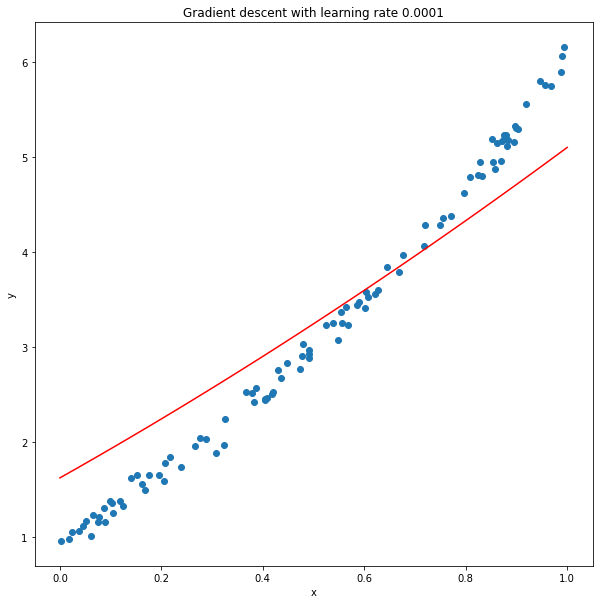

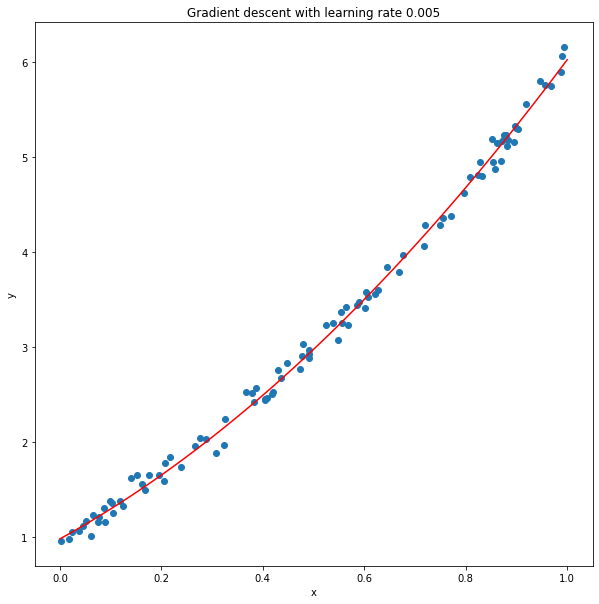

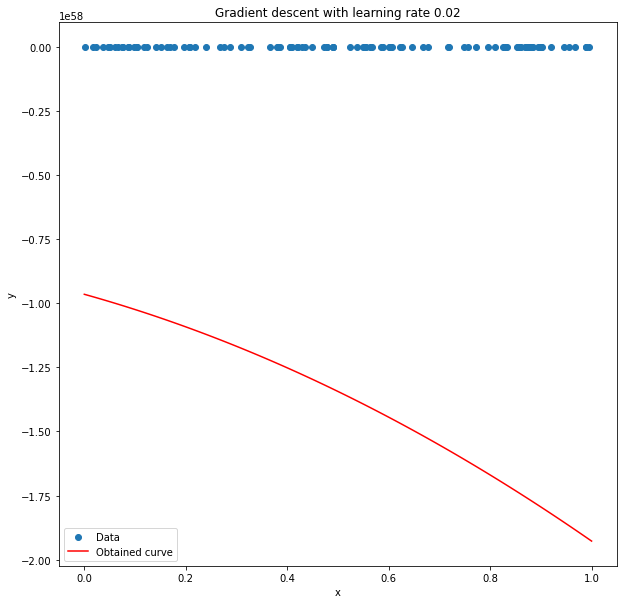

In [25]:
n = 100
x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

x_lins = np.linspace(0,1,100)


X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

n_its = 500
eta_list = [0.0001, 0.005, 0.02]

for eta in eta_list:
    betas = gradient_descent(Xtrain, ytrain, eta, n_its)
    ypred = Xtest @ betas

    fig = plt.figure(figsize = (10,10))
    plt.scatter(x,y,label="Data")
    plt.plot(x_lins, betas[0] + betas[1]*x_lins + betas[2]*x_lins**2, 'r',label="Obtained curve")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Gradient descent with learning rate " + str(eta))
plt.legend()

Text(0.5, 0, 'Iterations')

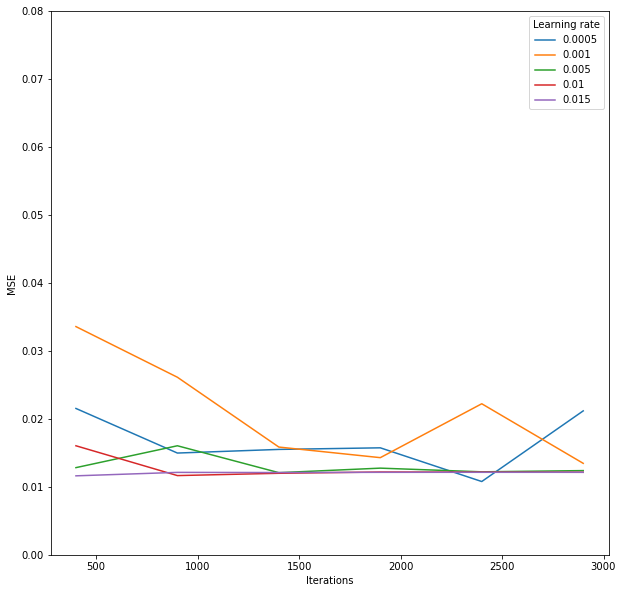

In [26]:
n = 100
x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

x_lins = np.linspace(0,1,100)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

n_its_list = np.arange(400,3001,500)
eta_list = [0.0005, 0.001, 0.005, 0.01, 0.015]
MSE = np.zeros((len(n_its_list),len(eta_list)))

for i in range(len(n_its_list)):
    for j in range(len(eta_list)):
        
        n_its = n_its_list[i]
        eta = eta_list[j]

        betas = gradient_descent(Xtrain, ytrain, eta, n_its)
        ypred = Xtest @ betas
        MSE[i][j] = mse(ytest,ypred)

fig = plt.figure(figsize = (10,10))
for j in range(len(eta_list)):
    plt.plot(n_its_list,MSE[:,j], label = str(eta_list[j]))
plt.legend(title ="Learning rate")
plt.ylim((0,0.08))
plt.ylabel("MSE")
plt.xlabel("Iterations")
#plt.savefig("epochs_eta_mse_gradient_descent.png")

Text(0.5, 1.0, 'MSE grid search for learning rate and epochs')

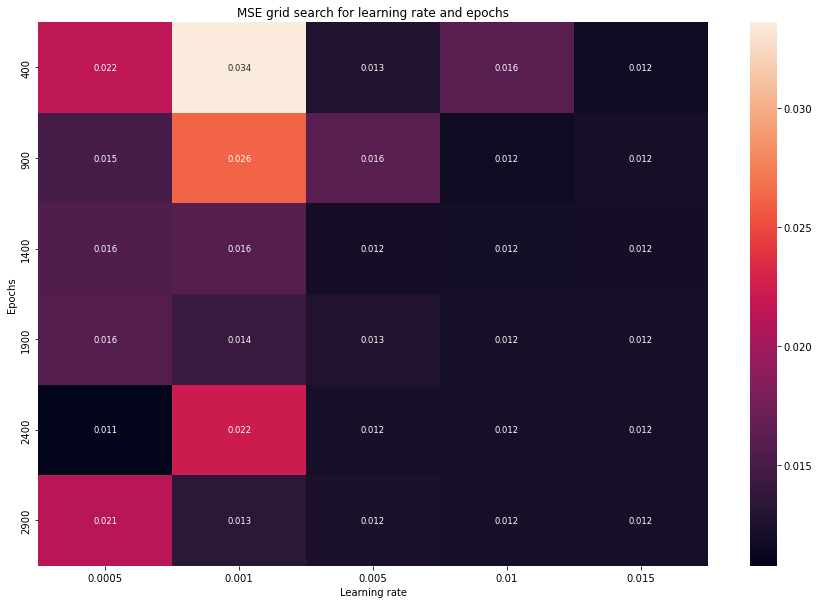

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(MSE, xticklabels=eta_list, yticklabels=n_its_list, annot=True, annot_kws={"size": 8.5}, fmt=".3f")
plt.xlabel("Learning rate")
plt.ylabel("Epochs")
plt.title("MSE grid search for learning rate and epochs")
#plt.savefig("Grid search for learning rate and epochs.png")

Text(0, 0.5, 'Beta0')

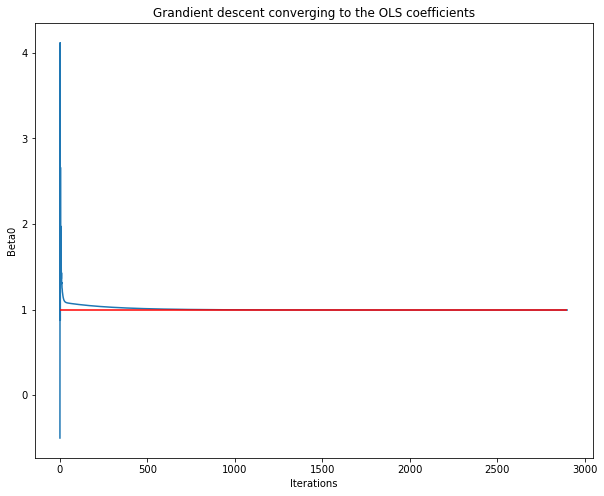

In [28]:
OLSbetas = np.linalg.inv(Xtrain.T @ Xtrain) @ Xtrain.T @ ytrain
betas = np.zeros((np.shape(X)[1],n_its+1))

# initialize betas randomly
betas[:,0] = np.squeeze(np.random.randn(np.shape(X)[1],1))
eta = 0.015

for iter in range(n_its):
    gradient = Xtrain.T @ (Xtrain @ betas[:,iter]-ytrain.T).T
    betas[:,iter+1] = betas[:,iter] - eta*gradient.T

fig = plt.figure(figsize = (10,8))
plt.plot(range(n_its+1), betas[0,:])
plt.hlines(OLSbetas[0],0,n_its,'r')
plt.title("Grandient descent converging to the OLS coefficients")
plt.xlabel("Iterations")
plt.xlabel("Iterations")
plt.ylabel("Beta0")
#plt.savefig("gradient_descent_converge_OLS.png")

## Neural network

In [ ]:
# regression neural network with keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential      #This allows appending layers to existing models
from tensorflow.keras.layers import Dense           #This allows defining the characteristics of a particular layer
from tensorflow.keras import optimizers             #This allows using whichever optimiser we want (sgd,adam,RMSprop)
from tensorflow.keras import regularizers           #This allows using whichever regularizer we want (l1,l2,l1_l2)
from tensorflow.keras.utils import to_categorical   #This allows using categorical cross entropy as the cost function

from sklearn.neural_network import MLPRegressor

In [30]:
n = 200
x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [34]:
# logistic regression

#from sklearn.neural_network import MLPClassifier

#dnn = MLPClassifier(hidden_layer_sizes=(50,), activation='logistic',alpha=lmbd, learning_rate_init=eta, max_iter=epochs)

In [35]:
from sklearn.datasets import load_breast_cancer

bunch = load_breast_cancer(as_frame=True)
data = np.array(bunch['data'])
target = np.array(bunch['target'])

betas = logistic_regression_sgd(data, target, 0.01, 400, 50)
ypred = sigmoid(data @ betas)>0.5
sum(target == ypred)/np.shape(data)[0]

C:\Users\dalma\AppData\Local\Temp\ipykernel_20696\3799409807.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


0.9086115992970123

In [132]:
class NeuralNetwork:
    
    def __init__(self, input_size, cost_function_grad, random_state):

        # number of features in the input X matrix
        self._input_size = input_size

        # random number generator to make results reproducible
        self.generator = np.random.default_rng(seed=random_state)
        
        # gradient of the cost function considered
        self.cost_function_grad = cost_function_grad

        # list of layers (starts out empty)
        self.layers = list()
        
    
    def add_layer(self, layer):

        # adds a layer to the network

        if len(self.layers) > 0:
            n_inputs = self.layers[-1]._size
        else:
            n_inputs = self._input_size

        # initializes weights and biases
        layer.create_weights(n_inputs, self.generator)
        
        self.layers.append(layer)


    def feed_forward(self, inputs):

        # returns a list of the outputs and activated outputs for each layer

        tmp = inputs
        a_h = [inputs]
        z_h = [inputs]
        for layer in self.layers:

            tmp, z = layer.forward(tmp)
            
            z_h.append(z)
            a_h.append(tmp)
        
        return a_h, z_h


    def feed_forward_out(self, inputs):
        
        # returns the output of the whole network with the current weights

        tmp = inputs
        for layer in self.layers:

            tmp, z = layer.forward(tmp)
        
        return tmp

    def back_prop(self, inputs, targets, learning_rate = 0.1, regularization = 0):

        # performs backpropagation

        for i in range(inputs.shape[0]):
            ins = np.matrix(inputs[i])
            targs = np.matrix(targets[i])

            # get outputs of each layer with feedforward
            a_h, z_h = self.feed_forward(ins)
            
            # perform stochastic gradient descent for each layer going backwards
            prev_layer_err = np.multiply(self.cost_function_grad(targs, a_h[-1]), self.layers[-1]._act_fn_grad(z_h[-1]))

            for j in range(len(self.layers)-1, -1, -1):
                prev_activation_fn = self.layers[j-1 if j > 0 else 0]._act_fn
                prev_layer_err = self.layers[j].backward(a_h[j], z_h[j], prev_layer_err, prev_activation_fn, learning_rate, regularization)
        

    def train(self, inputs, targets, initial_learning_rate= 0.1, final_learning_rate= None, epochs = 1000, minibatch_size = 20, regularization= 0):

        # performs training of the model by feedforward and backpropagation iteratively

        minibatch_count = int(inputs.shape[0] / minibatch_size)

        # computes the learning schedule between the initial and final learning rate
        learning_schedule = lambda epoch: initial_learning_rate
        if final_learning_rate is not None:
            t0 = initial_learning_rate * final_learning_rate / (initial_learning_rate - final_learning_rate) * epochs
            t1 = final_learning_rate / (initial_learning_rate - final_learning_rate) * epochs
            learning_schedule = lambda epoch: t0 / (t1 + epoch)

        for i in range(1, epochs+1):

            eta = learning_schedule(i)

            # we permute the data to obtain different minibatches each time
            perm = self.generator.permuted(np.arange(0, inputs.shape[0]))
            inputs = inputs[perm, :]
            targets = targets[perm, :]

            for m in range(minibatch_count):
                idx = minibatch_size * int(self.generator.random() * minibatch_count)
                ins = inputs[idx : idx + minibatch_size]
                targs = targets[idx : idx + minibatch_size]
                self.back_prop(ins, targs, learning_rate=eta, regularization=regularization)

In [350]:
class Layer():

    def __init__(self, size, act_fun, act_fun_grad, initial_bias = 0.001):

        self._size = size
        self._act_fn = act_fun
        self._act_fn_grad = act_fun_grad
        self._weights = None
        self._initial_bias = initial_bias
        self._biases = np.ones((self._size, 1)) * initial_bias


    def create_weights(self, input_size, rng):
        
        # initializes the weights for the layers between 0 and 1
        self._weights = rng.normal((self._size, input_size))

    def forward(self, inputs):
        
        # returns the output and activated output of the layer with the current weights and inputs
        z = (self._weights @ inputs.T + self._biases).T
        return self._act_fn(z), z

    def backward(self, activated_inputs, inputs, error, prev_act_fn_grad, learning_rate, regularization):

        # Compute gradients
        # Simple gradient descent
        weights_gradient = (activated_inputs.T @ error) + regularization * self._weights.T
        bias_gradient = error + regularization * self._biases.T
        
        # Adjust weights and biases
        self._weights -= learning_rate * weights_gradient.T
        self._biases -= learning_rate * bias_gradient.T

        # Return the estimated error in inputs
        return np.multiply((error @ self._weights), prev_act_fn_grad(inputs))

In [285]:
# Activation functions

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_grad(z):
    return sigmoid(z)*(1-sigmoid(z))

def ReLU(x):
    return np.multiply((x >= 0), x)

def ReLU_grad(x):
    return (x >= 0)*1

def leakyReLU(x):
    return np.multiply((x >= 0), x) + np.multiply((x < 0), x * 0.1)

def leakyReLU_grad(x):
    return (x >= 0)*1 + (x < 0)*0.1

def linear(x):
    return x

def linear_grad(x):
    return np.ones(np.shape(x))

def tanh(x):
    return np.tanh(x)

def tanh_grad(x):
    return 1 - np.tanh(x)*np.tanh(x)

In [104]:
# Cost function gradients

# regression
def regr_cost_grad(y_data, y_tilde):
    return (2 / y_tilde.shape[0]) * (y_tilde - y_data)

# classification
def class_cost_grad(y_data, y_tilde):
        return (y_tilde - y_data) / y_tilde.shape[0]

In [134]:
nn = NeuralNetwork(3,regr_cost_grad,random_state=1)
layer1 = Layer(50,sigmoid,sigmoid_grad)
layer2 = Layer(1,linear,linear_grad)
nn.add_layer(layer1)
nn.add_layer(layer2)
nn.train(Xtrain,ytrain,initial_learning_rate=0.015,epochs=100)
mse(nn.feed_forward_out(Xtest),ytest)

0.012735376841613699

In [188]:
n = 1000
x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

x_lins = np.linspace(0,1,100)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

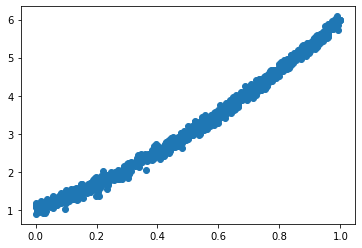

In [189]:
plt.scatter(x,y)

In [ ]:
# grid search number of neurons and eta:

n_neurons_list = [10,20,30,50,75]
eta_list = [1e-5, 1e-4, 0.001, 0.01, 0.015]
MSE = np.zeros((len(n_neurons_list),len(eta_list)))

for i in range(len(n_neurons_list)):
    for j in range(len(eta_list)):
        
        n_neurons = n_neurons_list[i]
        eta = eta_list[j]

        nn = NeuralNetwork(3,regr_cost_grad,random_state=1)
        layer1 = Layer(n_neurons,sigmoid,sigmoid_grad)
        layer2 = Layer(1,linear,linear_grad)
        nn.add_layer(layer1)
        nn.add_layer(layer2)
        nn.train(Xtrain,ytrain,initial_learning_rate=eta,epochs=100)
        MSE[i][j] = mse(nn.feed_forward_out(Xtest),ytest)

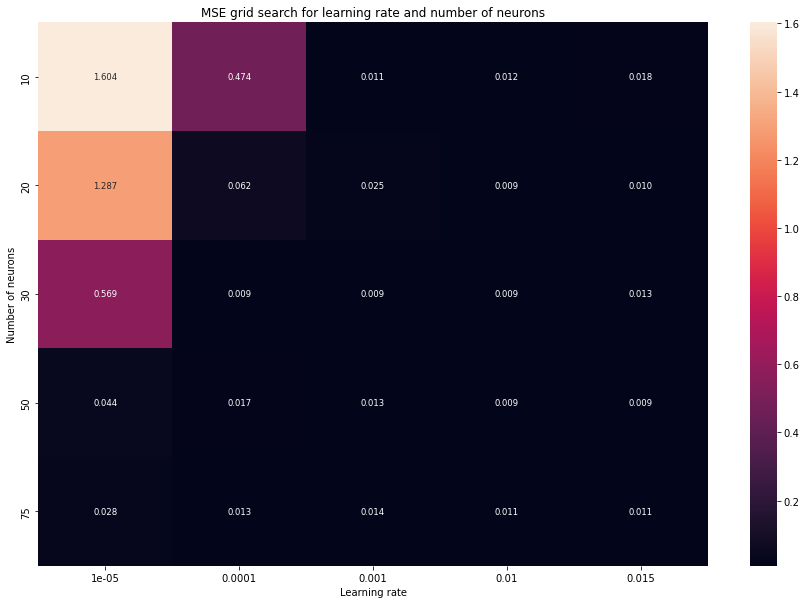

In [223]:
plt.figure(figsize=(15,10))
sns.heatmap(MSE, xticklabels=eta_list, yticklabels=n_neurons_list, annot=True, annot_kws={"size": 8.5}, fmt=".3f")
plt.xlabel("Learning rate")
plt.ylabel("Number of neurons")
plt.title("MSE grid search for learning rate and number of neurons")
#plt.savefig("Grid search for learning rate and epochs.png")

In [204]:
# evoluzione test e training durante le epochs

n_epochs=500
eta = 0.00001
step=10

nn = NeuralNetwork(3,regr_cost_grad,random_state=1)
layer1 = Layer(30,sigmoid,sigmoid_grad)
layer2 = Layer(1,linear,linear_grad)
nn.add_layer(layer1)
nn.add_layer(layer2)

MSE_train = []
MSE_test = []

for i in range(0,n_epochs,step):
    MSE_train.append(mse(nn.feed_forward_out(Xtrain),ytrain))
    MSE_test.append(mse(nn.feed_forward_out(Xtest),ytest))
    nn.train(Xtrain,ytrain,initial_learning_rate=eta,epochs=step,minibatch_size = 50)

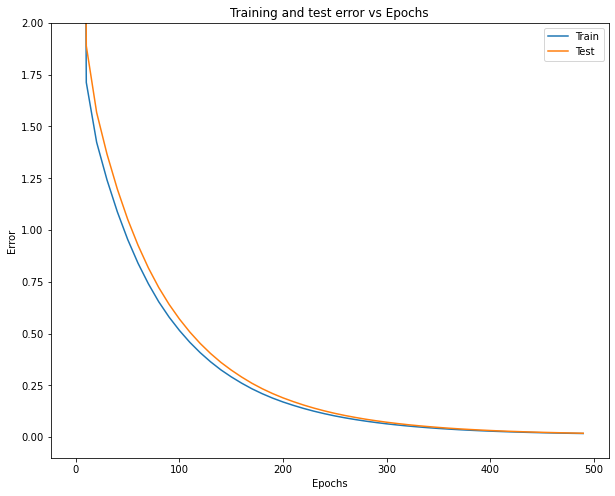

In [206]:
plt.figure(figsize=(10,8))
plt.plot(range(0,n_epochs,step),MSE_train,label='Train')
plt.plot(range(0,n_epochs,step),MSE_test,label='Test')
plt.legend()
plt.title("Training and test error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.ylim(-0.1,2)
#plt.savefig("train_test_error.png")

In [ ]:
# confronto numero di layer 1,2,3

# evoluzione test e training durante le epochs

n_epochs = 100
eta = 0.0001
step = 5

nn_1 = NeuralNetwork(3,regr_cost_grad,random_state=1)
nn_2 = NeuralNetwork(3,regr_cost_grad,random_state=1)
nn_3 = NeuralNetwork(3,regr_cost_grad,random_state=1)
layer11 = Layer(30,sigmoid,sigmoid_grad)
layer21 = Layer(1,linear,linear_grad)
layer12 = Layer(30,sigmoid,sigmoid_grad)
layer22 = Layer(30,sigmoid,sigmoid_grad)
layer32 = Layer(1,linear,linear_grad)
layer13 = Layer(30,sigmoid,sigmoid_grad)
layer23 = Layer(30,sigmoid,sigmoid_grad)
layer33 = Layer(30,sigmoid,sigmoid_grad)
layer43 = Layer(1,linear,linear_grad)

nn_1.add_layer(layer11)
nn_1.add_layer(layer21)
nn_2.add_layer(layer12)
nn_2.add_layer(layer22)
nn_2.add_layer(layer32)
nn_3.add_layer(layer13)
nn_3.add_layer(layer23)
nn_3.add_layer(layer33)
nn_3.add_layer(layer43)

MSE_1 = []
MSE_2 = []
MSE_3 = []


for i in range(0,n_epochs,step):
    MSE_1.append(mse(nn_1.feed_forward_out(Xtest),ytest))
    MSE_2.append(mse(nn_2.feed_forward_out(Xtest),ytest))
    MSE_3.append(mse(nn_3.feed_forward_out(Xtest),ytest))
    nn_1.train(Xtrain,ytrain,initial_learning_rate=eta,epochs=step,minibatch_size = 20)
    nn_2.train(Xtrain,ytrain,initial_learning_rate=eta,epochs=step,minibatch_size = 20)
    nn_3.train(Xtrain,ytrain,initial_learning_rate=eta,epochs=step,minibatch_size = 20)

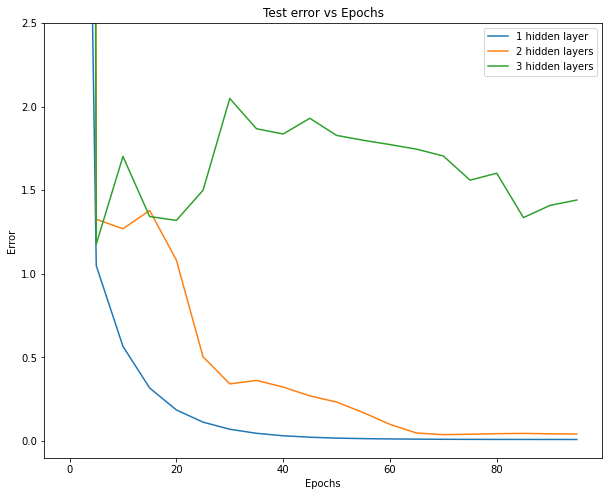

In [203]:
plt.figure(figsize=(10,8))
plt.plot(range(0,n_epochs,step),MSE_1,label='1 hidden layer')
plt.plot(range(0,n_epochs,step),MSE_2,label='2 hidden layers')
plt.plot(range(0,n_epochs,step),MSE_3,label='3 hidden layers')
plt.legend()
plt.title("Test error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.ylim(-0.1,2.5)
#plt.savefig("number_of_hidden_layers.png")

In [207]:
# gd and sgd (change minibatch size)

# evoluzione test e training durante le epochs

n_epochs = 400
eta = 0.00001
step = 5

nn_gd = NeuralNetwork(3,regr_cost_grad,random_state=1)
nn_sgd1 = NeuralNetwork(3,regr_cost_grad,random_state=1)
nn_sgd2 = NeuralNetwork(3,regr_cost_grad,random_state=1)
nn_sgd3 = NeuralNetwork(3,regr_cost_grad,random_state=1)
layer1gd = Layer(30,sigmoid,sigmoid_grad)
layer2gd = Layer(1,linear,linear_grad)
layer1sgd1 = Layer(30,sigmoid,sigmoid_grad)
layer2sgd1 = Layer(1,linear,linear_grad)
layer1sgd2 = Layer(30,sigmoid,sigmoid_grad)
layer2sgd2 = Layer(1,linear,linear_grad)
layer1sgd3 = Layer(30,sigmoid,sigmoid_grad)
layer2sgd3 = Layer(1,linear,linear_grad)
nn_gd.add_layer(layer1gd)
nn_gd.add_layer(layer2gd)
nn_sgd1.add_layer(layer1sgd1)
nn_sgd1.add_layer(layer2sgd1)
nn_sgd2.add_layer(layer1sgd2)
nn_sgd2.add_layer(layer2sgd2)
nn_sgd3.add_layer(layer1sgd3)
nn_sgd3.add_layer(layer2sgd3)

MSE_gd = []
MSE_sgd1 = []
MSE_sgd2 = []
MSE_sgd3 = []

for i in range(0,n_epochs,step):
    MSE_gd.append(mse(nn_gd.feed_forward_out(Xtest),ytest))
    MSE_sgd1.append(mse(nn_sgd1.feed_forward_out(Xtest),ytest))
    MSE_sgd2.append(mse(nn_sgd2.feed_forward_out(Xtest),ytest))
    MSE_sgd3.append(mse(nn_sgd3.feed_forward_out(Xtest),ytest))
    nn_gd.train(Xtrain,ytrain,initial_learning_rate=eta,epochs=step,minibatch_size = 1000)
    nn_sgd1.train(Xtrain,ytrain,initial_learning_rate=eta,epochs=step,minibatch_size = 50)
    nn_sgd2.train(Xtrain,ytrain,initial_learning_rate=eta,epochs=step,minibatch_size = 20)
    nn_sgd3.train(Xtrain,ytrain,initial_learning_rate=eta,epochs=step,minibatch_size = 1)

(-0.1, 2.0)

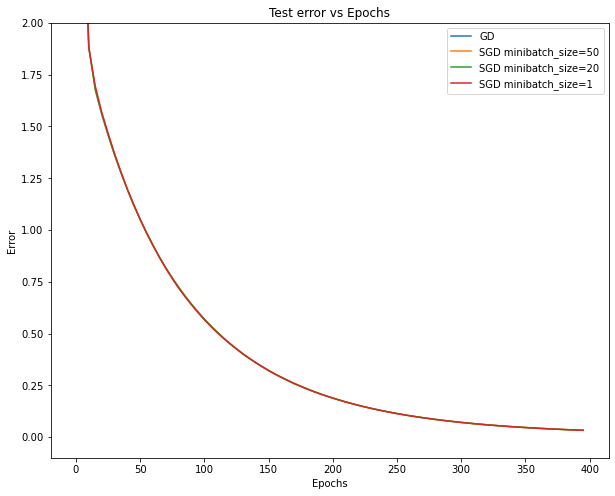

In [209]:
n_epochs = 400
eta = 0.00001
step = 5

plt.figure(figsize=(10,8))
plt.plot(range(0,n_epochs,step),MSE_gd,label='GD')
plt.plot(range(0,n_epochs,step),MSE_sgd1,label='SGD minibatch_size=50')
plt.plot(range(0,n_epochs,step),MSE_sgd2,label='SGD minibatch_size=20')
plt.plot(range(0,n_epochs,step),MSE_sgd3,label='SGD minibatch_size=1')
plt.legend()
plt.title("Test error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.ylim(-0.1,2)
plt.savefig("GD vs SGD test error")

In [322]:
#sigmoid
# grid search regularization and learning rate

eta_list = [1e-5, 1e-4, 0.001, 0.01, 0.015]
reg_list = [0, 0.01, 0.1, 1, 10]
MSE_sigm = np.zeros((len(reg_list),len(eta_list)))

for j in range(len(eta_list)):
    for i in range(len(reg_list)):
        
        reg = reg_list[i]
        eta = eta_list[j]

        nn = NeuralNetwork(3,regr_cost_grad,random_state=1)
        layer1 = Layer(30,sigmoid,sigmoid_grad)
        layer2 = Layer(1,linear,linear_grad)
        nn.add_layer(layer1)
        nn.add_layer(layer2)
        nn.train(Xtrain,ytrain,initial_learning_rate=eta,regularization=reg, epochs=200)
        MSE_sigm[i][j] = mse(nn.feed_forward_out(Xtest),ytest)

# best results for 0.0001 and 0

In [ ]:
#relu
# grid search regularization and learning rate

eta_list = [1e-5, 1e-4, 0.001, 0.01, 0.015]
reg_list = [0, 0.01, 0.1, 1, 10]
MSE_relu = np.zeros((len(reg_list),len(eta_list)))

for j in range(len(eta_list)):
    for i in range(len(reg_list)):
        
        reg = reg_list[i]
        eta = eta_list[j]

        nn = NeuralNetwork(3,regr_cost_grad,random_state=1)
        layer1 = Layer(30,ReLU,ReLU_grad)
        layer2 = Layer(1,linear,linear_grad)
        nn.add_layer(layer1)
        nn.add_layer(layer2)
        nn.train(Xtrain,ytrain,initial_learning_rate=eta,regularization=reg, epochs=200)
        MSE_relu[i][j] = mse(nn.feed_forward_out(Xtest),ytest)

# best results for 0.0001 and 0

In [ ]:
#leakyrelu
# grid search regularization and learning rate

eta_list = [1e-5, 1e-4, 0.001, 0.01, 0.015]
reg_list = [0, 0.01, 0.1, 1, 10]
MSE_lrelu = np.zeros((len(reg_list),len(eta_list)))

for j in range(len(eta_list)):
    for i in range(len(reg_list)):
        
        reg = reg_list[i]
        eta = eta_list[j]

        nn = NeuralNetwork(3,regr_cost_grad,random_state=1)
        layer1 = Layer(30,leakyReLU,leakyReLU_grad)
        layer2 = Layer(1,linear,linear_grad)
        nn.add_layer(layer1)
        nn.add_layer(layer2)
        nn.train(Xtrain,ytrain,initial_learning_rate=eta,regularization=reg, epochs=200)
        MSE_lrelu[i][j] = mse(nn.feed_forward_out(Xtest),ytest)

In [292]:
#tanh
# grid search regularization and learning rate

eta_list = [1e-5, 1e-4, 0.001, 0.01, 0.015]
reg_list = [0, 0.01, 0.1, 1, 10]
MSE_tanh = np.zeros((len(reg_list),len(eta_list)))

for j in range(len(eta_list)):
    for i in range(len(reg_list)):
       
        reg = reg_list[i]
        eta = eta_list[j]

        nn = NeuralNetwork(3,regr_cost_grad,random_state=1)
        layer1 = Layer(30,tanh,tanh_grad)
        layer2 = Layer(1,linear,linear_grad)
        nn.add_layer(layer1)
        nn.add_layer(layer2)
        nn.train(Xtrain,ytrain,initial_learning_rate=eta,regularization=reg, epochs=200)
        MSE_tanh[i][j] = mse(nn.feed_forward_out(Xtest),ytest)

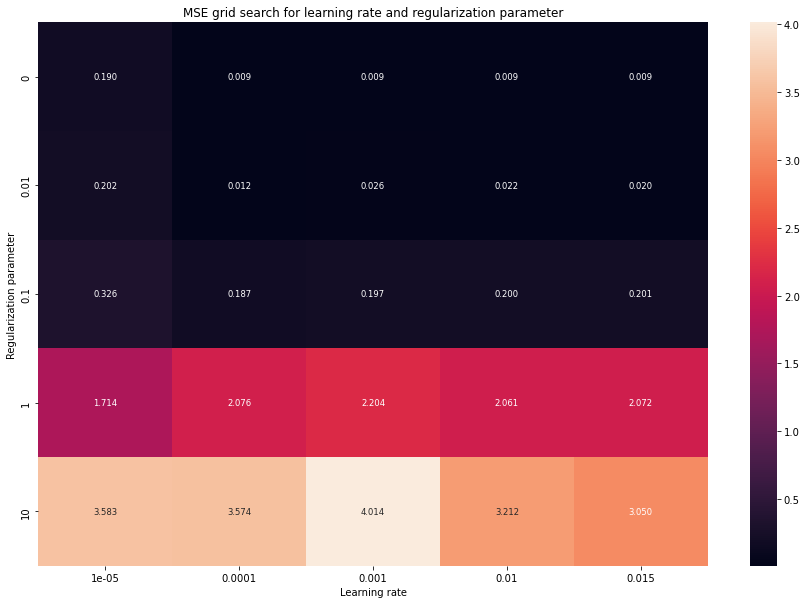

In [323]:
plt.figure(figsize=(15,10))
sns.heatmap(MSE_sigm, xticklabels=eta_list, yticklabels=reg_list, annot=True, annot_kws={"size": 8.5}, fmt=".3f")
plt.ylabel("Regularization parameter")
plt.xlabel("Learning rate")
plt.title("MSE grid search for learning rate and regularization parameter")
#plt.savefig("sigmoid_grid_search.png")

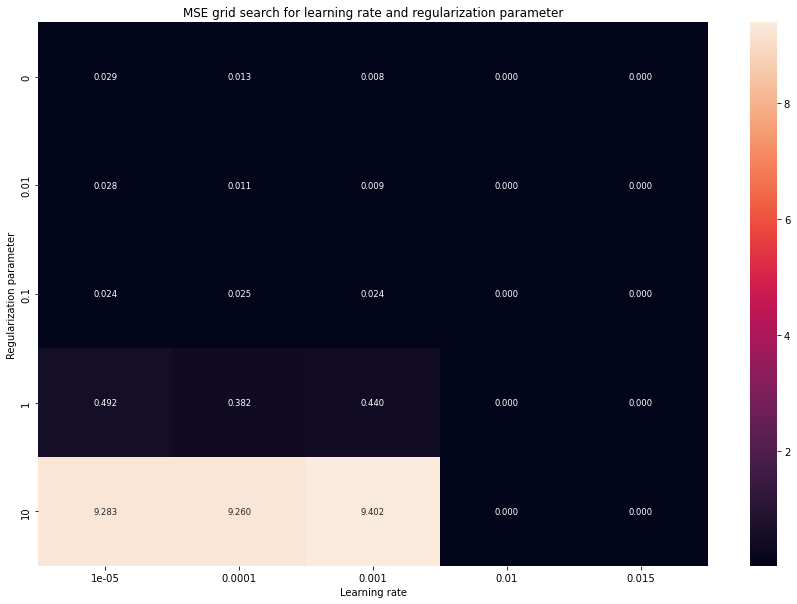

In [291]:
plt.figure(figsize=(15,10))
sns.heatmap(MSE_relu, vmin=0.007, vmax=9.405, xticklabels=eta_list, yticklabels=reg_list, annot=True, annot_kws={"size": 8.5}, fmt=".3f")
plt.ylabel("Regularization parameter")
plt.xlabel("Learning rate")
plt.title("MSE grid search for learning rate and regularization parameter")
#plt.savefig("RELU_Grid_search.png")

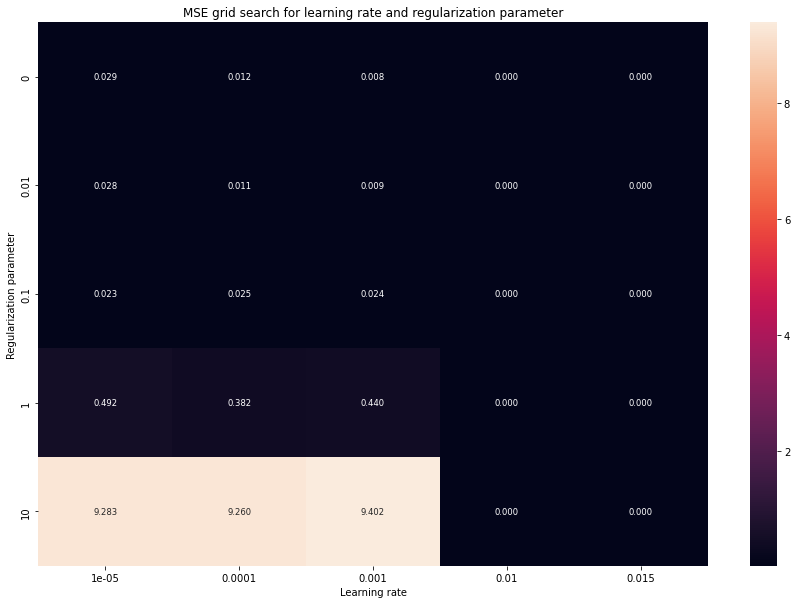

In [296]:
plt.figure(figsize=(15,10))
sns.heatmap(MSE_lrelu, vmin=0.007, vmax=9.405, xticklabels=eta_list, yticklabels=reg_list, annot=True, annot_kws={"size": 8.5}, fmt=".3f")
plt.ylabel("Regularization parameter")
plt.xlabel("Learning rate")
plt.title("MSE grid search for learning rate and regularization parameter")
plt.savefig("lrelu_grid_search.png")

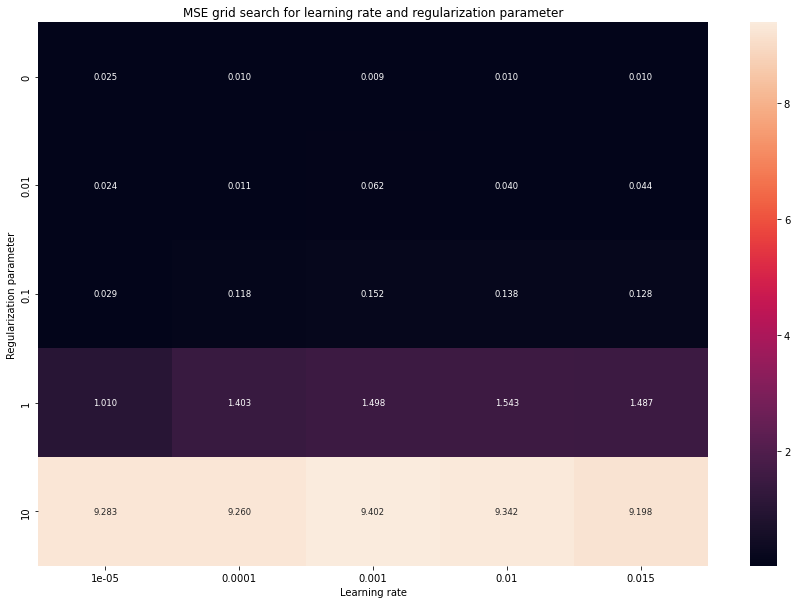

In [294]:
plt.figure(figsize=(15,10))
sns.heatmap(MSE_tanh, xticklabels=eta_list, yticklabels=reg_list, annot=True, annot_kws={"size": 8.5}, fmt=".3f")
plt.ylabel("Regularization parameter")
plt.xlabel("Learning rate")
plt.title("MSE grid search for learning rate and regularization parameter")
plt.savefig("tanh_grid_search.png")

In [317]:
# different learning rate schedules

# evoluzione test e training durante le epochs

n_epochs = 100
eta_const = 0.0001
init_eta = 0.01
final_eta = 0.0001
step = 5

nn_1 = NeuralNetwork(3,regr_cost_grad,random_state=1)
nn_2 = NeuralNetwork(3,regr_cost_grad,random_state=1)
layer11 = Layer(30,sigmoid,sigmoid_grad)
layer21 = Layer(1,linear,linear_grad)
layer12 = Layer(30,sigmoid,sigmoid_grad)
layer22 = Layer(1,linear,linear_grad)

nn_1.add_layer(layer11)
nn_1.add_layer(layer21)
nn_2.add_layer(layer12)
nn_2.add_layer(layer22)

MSE_1 = []
MSE_2 = []

for i in range(0,n_epochs,step):
    MSE_1.append(mse(nn_1.feed_forward_out(Xtest),ytest))
    MSE_2.append(mse(nn_2.feed_forward_out(Xtest),ytest))

    nn_1.train(Xtrain,ytrain,initial_learning_rate=eta_const,epochs=step,minibatch_size = 20)

    eta = init_eta + (final_eta-init_eta)*i/n_epochs
    nn_2.train(Xtrain,ytrain,initial_learning_rate=0.01, epochs=step,minibatch_size = 20)

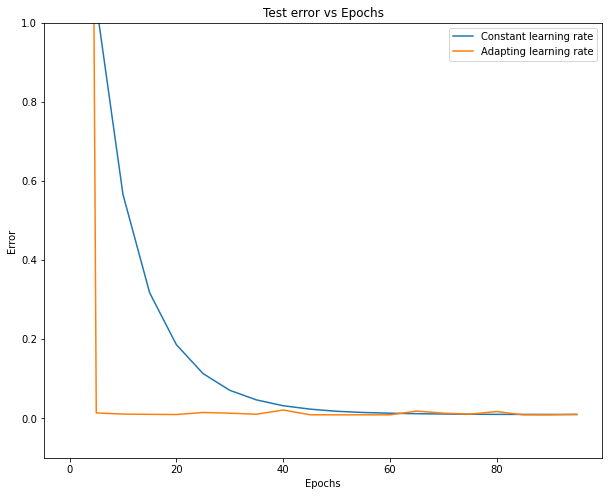

In [319]:
plt.figure(figsize=(10,8))
plt.plot(range(0,n_epochs,step),MSE_1,label='Constant learning rate')
plt.plot(range(0,n_epochs,step),MSE_2,label='Adapting learning rate')
plt.legend()
plt.title("Test error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.ylim(-0.1,1)
#plt.savefig("constant_adapting_lr.png")

In [248]:
# comparison with previous code and with tensorflow/keras functions

model = Sequential()
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
model.fit(Xtrain,ytrain,epochs=500,verbose=0)

tf_error = model.evaluate(Xtest,ytest)

dnn = MLPRegressor(hidden_layer_sizes=(30,),learning_rate_init=0.001, max_iter=500)
dnn.fit(Xtrain,ytrain)
test_predict = dnn.predict(Xtest)

sklearn_error = mse(test_predict,ytest)

nn = NeuralNetwork(3,regr_cost_grad,random_state=1)
layer1 = Layer(30,sigmoid,sigmoid_grad)
layer2 = Layer(1,linear,linear_grad)
nn.add_layer(layer1)
nn.add_layer(layer2)
nn.train(Xtrain,ytrain,initial_learning_rate=0.001,regularization=0, epochs=500)
nn_error = mse(nn.feed_forward_out(Xtest),ytest)

print("Tensorflow error: " + str(tf_error))
print("Scikit-learn error: " + str(sklearn_error))
print("Our model's error: " + str(nn_error))

7/7 [==============================] - 0s 1ms/step - loss: 0.0090


c:\Users\dalma\anaconda3\envs\uni\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tensorflow error: 0.008955704048275948
Scikit-learn error: 0.010229009836413158
Our model's error: 0.009026643141006162


In [328]:
# weights con variance diverse
# bias con normal distribution o fissi

# evoluzione test e training durante le epochs

n_epochs = 100
eta=0.0001
step = 5

nn = NeuralNetwork(3,regr_cost_grad,random_state=1)
layer1 = Layer(30,sigmoid,sigmoid_grad)
layer2 = Layer(1,linear,linear_grad)

nn.add_layer(layer1)
nn.add_layer(layer2)

var1_err=[]
varn_err = []

for i in range(0,n_epochs,step):
    varn_err.append(mse(nn.feed_forward_out(Xtest),ytest))
    nn.train(Xtrain,ytrain,initial_learning_rate=eta,epochs=step,minibatch_size = 20)

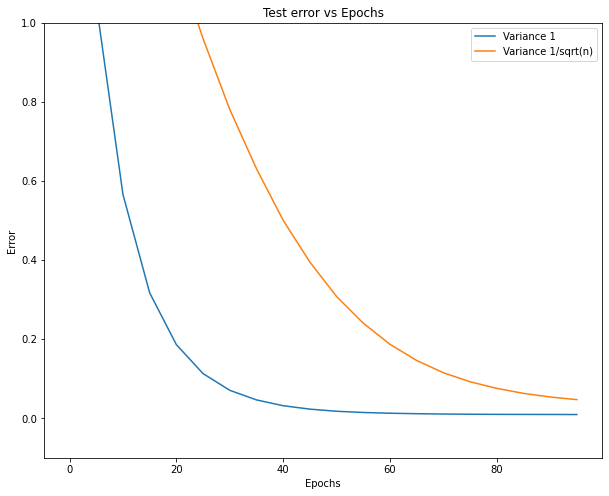

In [330]:
plt.figure(figsize=(10,8))
plt.plot(range(0,n_epochs,step),var1_err,label='Variance 1')
plt.plot(range(0,n_epochs,step),varn_err,label='Variance 1/sqrt(n)')
plt.legend()
plt.title("Test error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.ylim(-0.1,1)
#plt.savefig("weight_variance.png")

In [346]:
# different bias initialization

# evoluzione test e training durante le epochs

n_epochs = 100
eta=0.001
step = 5

nn = NeuralNetwork(3,regr_cost_grad,random_state=1)
layer1 = Layer(30,sigmoid,sigmoid_grad,initial_bias=1)
layer2 = Layer(1,linear,linear_grad, initial_bias=1)

nn.add_layer(layer1)
nn.add_layer(layer2)

b5_err = []

for i in range(0,n_epochs,step):
    b5_err.append(mse(nn.feed_forward_out(Xtest),ytest))
    nn.train(Xtrain,ytrain,initial_learning_rate=eta_const,epochs=step,minibatch_size = 20)

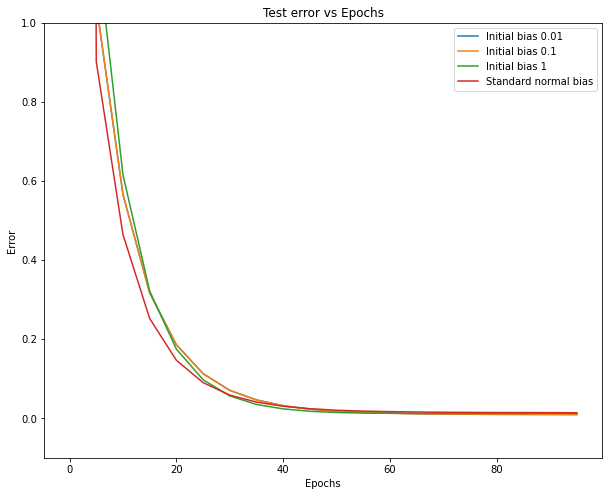

In [349]:
plt.figure(figsize=(10,8))
plt.plot(range(0,n_epochs,step),b1_err,label='Initial bias 0.01')
plt.plot(range(0,n_epochs,step),b2_err,label='Initial bias 0.1')
plt.plot(range(0,n_epochs,step),b4_err,label='Initial bias 1')
plt.plot(range(0,n_epochs,step),b5_err,label='Standard normal bias')
plt.legend()
plt.title("Test error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.ylim(-0.1,1)
#plt.savefig("bias_init.png")

In [310]:
# different activation functions
# evoluzione test e training durante le epochs

n_epochs = 400
step = 5

nn_sigm = NeuralNetwork(3,regr_cost_grad,random_state=1)
nn_relu = NeuralNetwork(3,regr_cost_grad,random_state=1)
nn_lrelu = NeuralNetwork(3,regr_cost_grad,random_state=1)
nn_tanh = NeuralNetwork(3,regr_cost_grad,random_state=1)
layer1sigm = Layer(30,sigmoid,sigmoid_grad)
layer2sigm= Layer(1,linear,linear_grad)
layer1relu = Layer(30,ReLU,ReLU_grad)
layer2relu = Layer(1,linear,linear_grad)
layer1lrelu = Layer(30,leakyReLU,leakyReLU_grad)
layer2lrelu = Layer(1,linear,linear_grad)
layer1tanh = Layer(30,tanh,tanh_grad)
layer2tanh = Layer(1,linear,linear_grad)
nn_sigm.add_layer(layer1sigm)
nn_sigm.add_layer(layer2sigm)
nn_relu.add_layer(layer1relu)
nn_relu.add_layer(layer2relu)
nn_lrelu.add_layer(layer1lrelu)
nn_lrelu.add_layer(layer2lrelu)
nn_tanh.add_layer(layer1tanh)
nn_tanh.add_layer(layer2tanh)

err_sigm = []
err_relu = []
err_lrelu = []
err_tanh = []

for i in range(0,n_epochs,step):
    err_sigm.append(mse(nn_sigm.feed_forward_out(Xtest),ytest))
    err_relu.append(mse(nn_relu.feed_forward_out(Xtest),ytest))
    err_lrelu.append(mse(nn_lrelu.feed_forward_out(Xtest),ytest))
    err_tanh.append(mse(nn_tanh.feed_forward_out(Xtest),ytest))
    nn_sigm.train(Xtrain,ytrain,initial_learning_rate=0.00001,epochs=step)
    nn_relu.train(Xtrain,ytrain,initial_learning_rate=0.00001,epochs=step)
    nn_lrelu.train(Xtrain,ytrain,initial_learning_rate=0.00001,epochs=step)
    nn_tanh.train(Xtrain,ytrain,initial_learning_rate=0.00001,epochs=step)

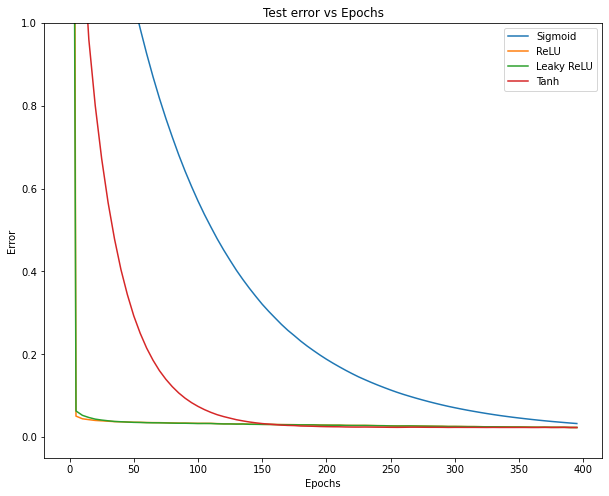

In [313]:
plt.figure(figsize=(10,8))
plt.plot(range(0,n_epochs,step),err_sigm,label='Sigmoid')
plt.plot(range(0,n_epochs,step),err_relu,label='ReLU')
plt.plot(range(0,n_epochs,step),err_lrelu,label='Leaky ReLU')
plt.plot(range(0,n_epochs,step),err_tanh,label='Tanh')
plt.legend()
plt.title("Test error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.ylim(-0.05,1)
plt.savefig("nn_activation_function.png")

In [ ]:
# same analysis with classification
# normalize breast cancer dataset

In [ ]:
# comparison with logistic regression e sklearn logistic regression